In [139]:
#導入函式
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import datetime
import seaborn as sns
from sklearn import cluster, datasets
import datetime
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [140]:
#匯入資料(csv需儲存在同資料夾下)
Obesity = pd.read_csv('ObesityDataSet.csv')

In [141]:
Obesity["BMI"] = Obesity["Weight"]/(Obesity["Height"]*Obesity["Height"])
Obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [142]:
np.unique(Obesity['NObeyesdad'])

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [143]:
#查看資料型態
Obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [144]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in Obesity[["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS","NObeyesdad"]]:
    Obesity[col]=le.fit_transform(Obesity[col]).astype(np.int64)
Obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1,24.386526
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1,24.238227
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1,23.765432
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5,26.851852
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4,44.901475
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4,43.741923
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4,43.543817
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4,44.071535


In [7]:
#import csv 
#Obesity.to_csv('test.csv')

# 離群值處理

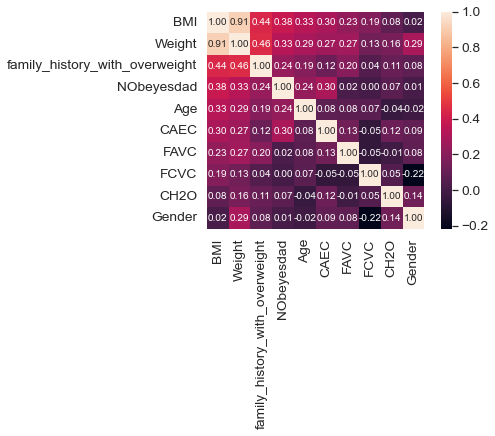

In [131]:
k = 10 #number of variables for heatmap
corrmat = Obesity.corr()
cols = corrmat.nlargest(k, 'BMI')['BMI'].index
cm = np.corrcoef(Obesity[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,                        # col val
                 cbar=True,                 # some paramter      
                 annot=True, square=True,   # some paramter
                 fmt='.2f',                 # format, fmt
                 annot_kws={'size': 10},    # anoo size
                 yticklabels=cols.values,   # y val
                 xticklabels=cols.values)   # v val
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


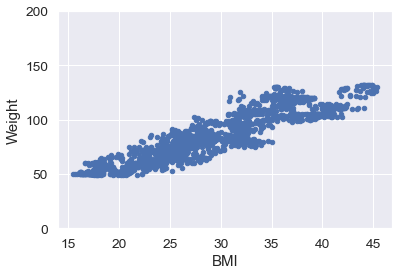

In [152]:
#散點圖(依變數和相關性高的變數)
var = 'BMI'
data = pd.concat([Obesity['Weight'], Obesity[var]], axis=1)
data.plot.scatter(x=var, y='Weight', ylim=(0,200));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


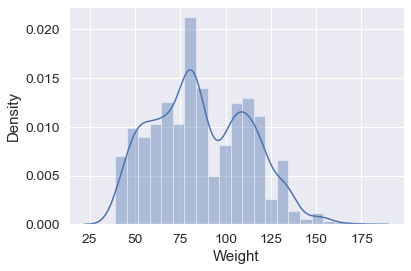

In [146]:
#分布狀態與和密度估計圖
sns.distplot(Obesity['Weight'])
plt.show()

In [147]:
sqrt_target = Obesity['Weight']**(1/2)

In [149]:
#移除離群值
print ("刪除離群值前的資料(列/欄)：",Obesity.shape)
n=0.5
#IQR = Q3-Q1
IQR = np.percentile(sqrt_target,75) - np.percentile(sqrt_target,25)
#outlier = Q3 + n*IQR 
Obesity=Obesity[sqrt_target < np.percentile(sqrt_target,75)+n*IQR]
#outlier = Q1 - n*IQR 
Obesity=Obesity[sqrt_target > np.percentile(sqrt_target,25)-n*IQR]
print ("刪除離群值後的資料(列/欄)：",Obesity.shape)

刪除離群值前的資料(列/欄)： (2111, 18)
刪除離群值後的資料(列/欄)： (1904, 18)


C:\Users\FUZZY_LAB\AppData\Local\Temp\ipykernel_7700\1857406234.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Obesity=Obesity[sqrt_target > np.percentile(sqrt_target,25)-n*IQR]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


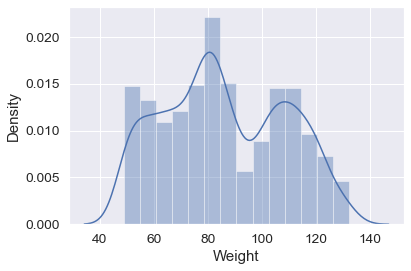

In [150]:
#移除離群值後的分布狀態與和密度估計圖
sns.distplot(Obesity['Weight'])
plt.show()

# Purity運算函式

In [154]:
def purity_score(y_true, y_pred):
    # matrix which will hold the majority-voted labels
    #生成一個真實標籤大小的矩陣，且個數皆為0
    y_voted_labels = np.zeros(y_true.shape) #e.g. array([0., 0., 0.,..., 0., 0.])        
    #讀取標籤類別個數
    labels = np.unique(y_true) #e.g. array([0, 2, 3])  
    ordered_labels = np.arange(labels.shape[0]) #e.g. array([0, 1, 2])
    for k in range(labels.shape[0]):
        #將資料集y的類別放進ordered_labels
        y_true[y_true==labels[k]] = ordered_labels[k]
        
    # 更新唯一標籤。Update unique labels
    labels = np.unique(y_true)
    # 我們將bins的數量設定為n_classes+2。We set the number of bins to be n_classes+2 so that 
    # 我們計算兩個連續bins之間類別的實際發生次數。we count the actual occurence of classes between two consecutive bins
    # 較大的會被排除掉。the bigger being excluded [bin_i, bin_i+1]
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0) #e.g. array([0, 1, 2, 3])

    #將預測結果與調整完之實際labels比較
    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # 找群中最常見的標籤。Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner

    #傳回純度值
    return accuracy_score(y_true, y_voted_labels)

# 原始結果

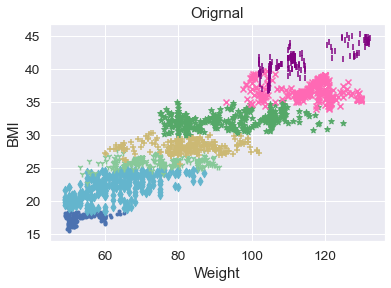

In [153]:
plt.title('Origrnal')
plt.xlabel('Weight')
plt.ylabel('BMI')
a = Obesity.values[Obesity.values[:,16]==0]
b = Obesity.values[Obesity.values[:,16]==1]
c = Obesity.values[Obesity.values[:,16]==2]
d = Obesity.values[Obesity.values[:,16]==3]
e = Obesity.values[Obesity.values[:,16]==4]
f = Obesity.values[Obesity.values[:,16]==5]
g = Obesity.values[Obesity.values[:,16]==6]
plt.scatter(a[:, 3], a[:, 17], c="b", marker='.')  
plt.scatter(b[:, 3], b[:, 17], c="c", marker='d')  
plt.scatter(c[:, 3], c[:, 17], c="g", marker='*')
plt.scatter(d[:, 3], d[:, 17], c="hotpink", marker='x')
plt.scatter(e[:, 3], e[:, 17], c="purple", marker='|')
plt.scatter(f[:, 3], f[:, 17], c="#88c999", marker='1')
plt.scatter(g[:, 3], g[:, 17], c="y", marker='+')

# K-Means

In [155]:
from sklearn.cluster import KMeans
#起始時間
start = datetime.datetime.now()
#K-Means分群訓練
kmeans_fit = cluster.KMeans(n_clusters = 7).fit(Obesity)
#結束時間
end = datetime.datetime.now()
# 印出分群結果
centers = kmeans_fit.cluster_centers_ 
y_kmeans = kmeans_fit.predict(Obesity) 
cluster_labels = kmeans_fit.labels_
print("分群結果：",cluster_labels)
#輸出程式花費時間
print("執行時間：", end - start)
#輸出Purity指標
print("Purity:",purity_score(Obesity.values[:,16], kmeans_fit.labels_))
#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(Obesity, kmeans_fit.labels_,metric='euclidean'))

分群結果： [1 2 6 ... 3 0 0]
執行時間： 0:00:00.121662
Purity: 0.5084033613445378
Silhouette Coefficient: 0.3749289793690888


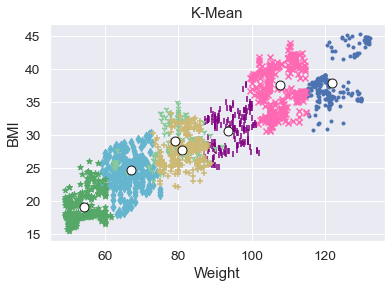

In [156]:
#散佈圖
plt.title('K-Mean')
plt.xlabel('Weight')
plt.ylabel('BMI')
a = Obesity.values[y_kmeans==0]
b = Obesity.values[y_kmeans==1]
c = Obesity.values[y_kmeans==2]
d = Obesity.values[y_kmeans==3]
e = Obesity.values[y_kmeans==4]
f = Obesity.values[y_kmeans==5]
g = Obesity.values[y_kmeans==6]
plt.scatter(a[:, 3], a[:, 17], c="b", marker='.')  
plt.scatter(b[:, 3], b[:, 17], c="c", marker='d')  
plt.scatter(c[:, 3], c[:, 17], c="g", marker='*')
plt.scatter(d[:, 3], d[:, 17], c="hotpink", marker='x')
plt.scatter(e[:, 3], e[:, 17], c="purple", marker='|')
plt.scatter(f[:, 3], f[:, 17], c="#88c999", marker='1')
plt.scatter(g[:, 3], g[:, 17], c="y", marker='+')
#plt.scatter(Obesity.values[:,3],Obesity.values[:,17], c = y_kmeans,edgecolor = 'none')
#中心點
plt.scatter(centers[:, 3],centers[:, 17], c='w', marker='o', edgecolors='k', s=80)
plt.show() 

# Hierarchical

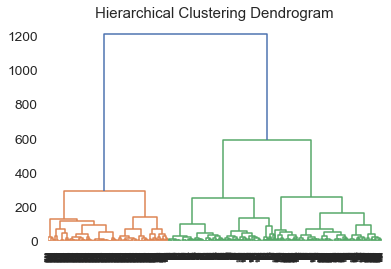

執行時間： 0:00:24.923361
Purity: 0.4742647058823529
Silhouette Coefficient: 0.33849784626920765
[4 3 6 ... 2 1 1]


In [157]:
import scipy.cluster.hierarchy as sch
#起始時間
start = datetime.datetime.now()
dis=sch.linkage(Obesity,metric='euclidean',method='ward')
sch.dendrogram(dis)
Hclustering=sch.fcluster(dis,7,criterion='maxclust')
#結束時間
end = datetime.datetime.now()
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
#結束時間
end = datetime.datetime.now()
#輸出程式花費時間
print("執行時間：", end - start)
#輸出Purity指標
print("Purity:",purity_score(Obesity.values[:,16], Hclustering))
#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(Obesity, Hclustering,metric='euclidean'))
print(Hclustering)

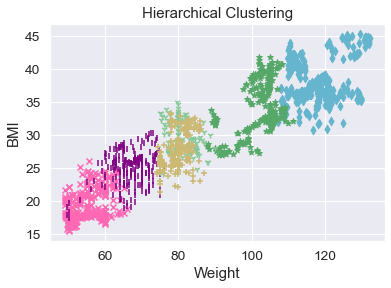

In [158]:
#散佈圖
plt.title('Hierarchical Clustering')
plt.xlabel('Weight')
plt.ylabel('BMI')
a = Obesity.values[Hclustering==0]
b = Obesity.values[Hclustering==1]
c = Obesity.values[Hclustering==2]
d = Obesity.values[Hclustering==3]
e = Obesity.values[Hclustering==4]
f = Obesity.values[Hclustering==5]
g = Obesity.values[Hclustering==6]
plt.scatter(a[:, 3], a[:, 17], c="b", marker='.')  
plt.scatter(b[:, 3], b[:, 17], c="c", marker='d')  
plt.scatter(c[:, 3], c[:, 17], c="g", marker='*')
plt.scatter(d[:, 3], d[:, 17], c="hotpink", marker='x')
plt.scatter(e[:, 3], e[:, 17], c="purple", marker='|')
plt.scatter(f[:, 3], f[:, 17], c="#88c999", marker='1')
plt.scatter(g[:, 3], g[:, 17], c="y", marker='+')
#mValue = ['.','o','^','8','s','*','+']
#plt.scatter(Obesity.values[:,3],Obesity.values[:,17],c=Hclustering,marker=i)

# DBSCAN

In [159]:
#訓練
from sklearn.cluster import DBSCAN
#起始時間
start = datetime.datetime.now()
Dclustering=DBSCAN(eps=3.5,min_samples=7).fit(Obesity)
#結束時間
end = datetime.datetime.now()
#輸出程式花費時間
print("執行時間：", end - start)
#輸出Purity指標
print("Purity:",purity_score(Obesity.values[:,16], Dclustering.labels_))
#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(Obesity, Dclustering.labels_,metric='euclidean'))
#機器自動分群並預測結果
print(Dclustering.labels_)

執行時間： 0:00:00.041918
Purity: 0.6959033613445378
Silhouette Coefficient: 0.009303947105150166
[ 0 -1 -1 ...  5 14 14]


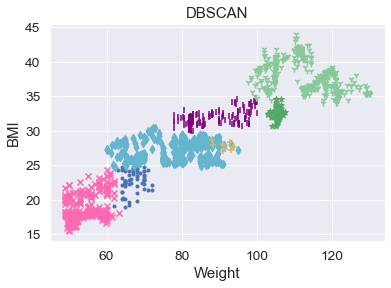

In [160]:
#散佈圖
plt.title('DBSCAN')
plt.xlabel('Weight')
plt.ylabel('BMI')
a = Obesity.values[Dclustering.labels_==0]
b = Obesity.values[Dclustering.labels_==1]
c = Obesity.values[Dclustering.labels_==2]
d = Obesity.values[Dclustering.labels_==3]
e = Obesity.values[Dclustering.labels_==4]
f = Obesity.values[Dclustering.labels_==5]
g = Obesity.values[Dclustering.labels_==6]
plt.scatter(a[:, 3], a[:, 17], c="b", marker='.')  
plt.scatter(b[:, 3], b[:, 17], c="c", marker='d')  
plt.scatter(c[:, 3], c[:, 17], c="g", marker='*')
plt.scatter(d[:, 3], d[:, 17], c="hotpink", marker='x')
plt.scatter(e[:, 3], e[:, 17], c="purple", marker='|')
plt.scatter(f[:, 3], f[:, 17], c="#88c999", marker='1')
plt.scatter(g[:, 3], g[:, 17], c="y", marker='+')
#plt.scatter(Obesity.values[:,3],Obesity.values[:,17],c=Dclustering.labels_,cmap='rainbow')